# Tutorium 5
## Fouriertransformation

#### Lernziele:
Nach dieser Übung wisst iher:
- was Prinzip einer Fourierreihe ist
- wofür man solche Reihen anwendet
- wie ihr selbst Signale in Python transformieren und im Frequenzbereich manipulieren könnt

### S05E01 The one with Fourier Series Theory

> siehe Präsentationsfolien

### S05E02 The one with plotting frequencies

Erstellen Sie ein Python Skript, das eine Audiodatei einliest und im Zeitbereich und Frequenzbereich darstellt. Nutzen Sie für die Umwandlung des Signals in den Frequenzbereich die Funktionen ``fft()`` und ``fftfreq()`` aus dem Paket ``scipy.fft``.

In [13]:
# Pakete importieren
import numpy as np
import scipy.io.wavfile as wavfile
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

#### Audio importieren

In [14]:
wav_filename = "music.wav"

# Hier lesen wir die Datei ein und erhalten 
# 1. sample_rate: Die Anzahl an Abtastungen pro Sekunde (d.h. wie viele Abtastwerte aus data machen 1 Sekunde Audio aus)
# 2. data:        Die einzelnen Abtastwerte
sample_rate, data = wavfile.read(wav_filename)

print(f"Abtastrate: {sample_rate} Werte/s  |  Abgetastete Werte: {len(data)}")
print(f"Damit haben wir genau {len(data) / sample_rate} Sekunden Audio.")

Abtastrate: 44100 Werte/s  |  Abgetastete Werte: 569891
Damit haben wir genau 12.922698412698413 Sekunden Audio.


#### Fouriertransformation durchführen
- Berechnen Sie mit ``fft()`` die *Fast Fourier Transform* des Signals
- Wandeln Sie das Ergebnis in reelle Werte um

In [15]:
# Hier berechnen wir das Ergebnis der diskreten Fouriertransformation.
# Das Ergebnis ist ein Array mit komplexen Zahlen.
# Die Realteile sind die Amplituden und die Imaginärteile sind die Phasenverschiebungen der Frequenzen.
fourier_result_complex = fft(data)

# Weil wir nur die Amplituden brauchen, nehmen wir nur den Realteil.
# Numpy Arrays habe die Realteile in der 'real' Eigenschaft gespeichert.
fourier_result = fourier_result_complex.real

print(f"Ergebnis der fft(...) Funktion: [{fourier_result_complex[1]}...{fourier_result_complex[-1]}]")
print(f"Ergebnis der Konvertierung zu reelen Zahlen: [{fourier_result[1]}...{fourier_result[-1]}]")

Ergebnis der fft(...) Funktion: [(592365.3807567786+301018.2371502601j)...(592365.3807567786-301018.2371502601j)]
Ergebnis der Konvertierung zu reelen Zahlen: [592365.3807567786...592365.3807567786]


Was bedeuten diese Werte?
- Jedes Element von ``fourier_result`` kann einer Frequenz zugeordnet werden
- ``fourier_result`` enthält also die Amplituden der Frequenzen (die wir gleich noch berechnen werden)

Wir beobachten: Die Listen hören gleich auf, wie sie anfangen ``->`` sind in der Mitte gespiegelt
- Fouriertransformation gibt uns Werte für "positive" und "negative" Frequenzen zurück
- Diese sind für Frequenzen mit dem gleichen Betrag immer gleich (d.h. Amplitude von ``-f`` ist immer gleich Amplitude von ``f``)

#### Vorkommenden Frequenzen mit ``fftfreq()``

In [16]:
# fftfreq(...) gibt die Frequenzen zu den Abtastwerten zurück.
# Hier erhalten wir ein Array, dass für jeden Wert von fourier_result eine Frequenz hat, zu dem er gehört.
# Das entspricht allen Frequenzen, die wir mit der Abtastrate sample_rate theoretisch abtasten könnten.
frequencies = fftfreq(len(data), 1 / sample_rate)

print(f"Frequenzen: {frequencies[:3]}...{frequencies[-3:]}")
print(f"Anzahl der Frequenzen ({len(frequencies)}) passt zur Anzahl der Amplituden ({len(fourier_result)}).")

Frequenzen: [0.         0.07738322 0.15476644]...[-0.23214966 -0.15476644 -0.07738322]
Anzahl der Frequenzen (569891) passt zur Anzahl der Amplituden (569891).


Wir beobachten:
- Auch hier sind die Werte gespiegelt (und zusätzlich im Vorzeichen umgedreht).
- Das passt zu den gespiegelten Amplitudenwerten (da bspw. ``f = 0.1`` die selbe Amplitude bekommen soll wie ``f = -0.1``).
- Die ``0`` am Anfang des Arrays ist nicht gespiegelt, da es kein positives und negatives ``0`` gibt.

#### Plotten im Zeitbereich

(569891,)


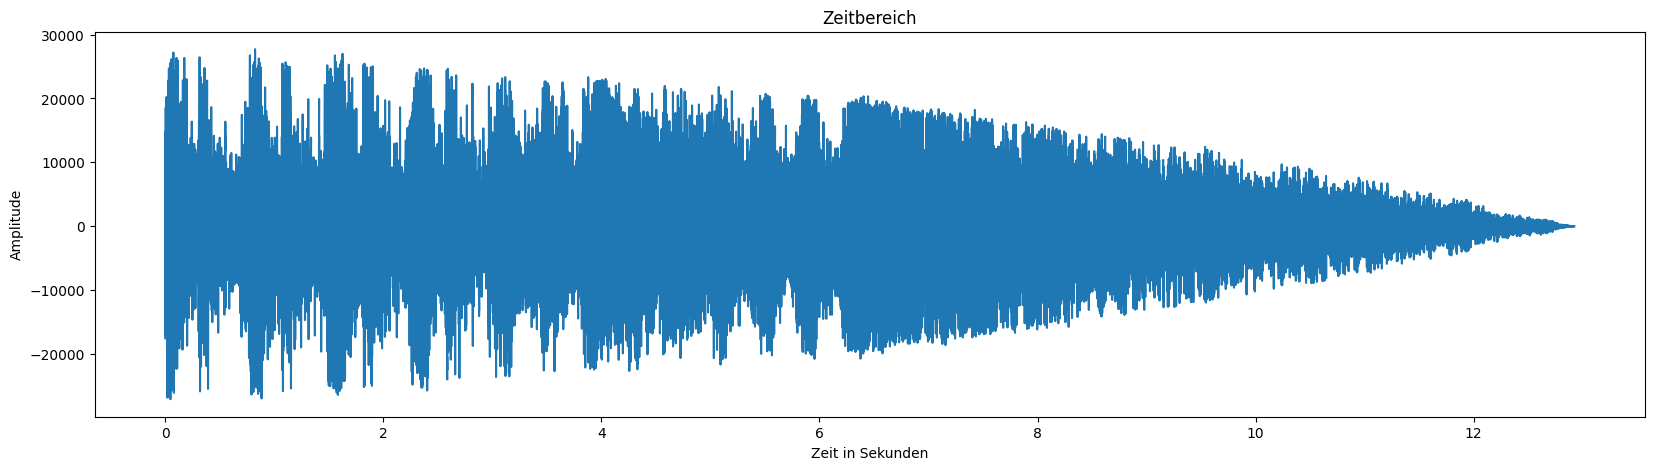

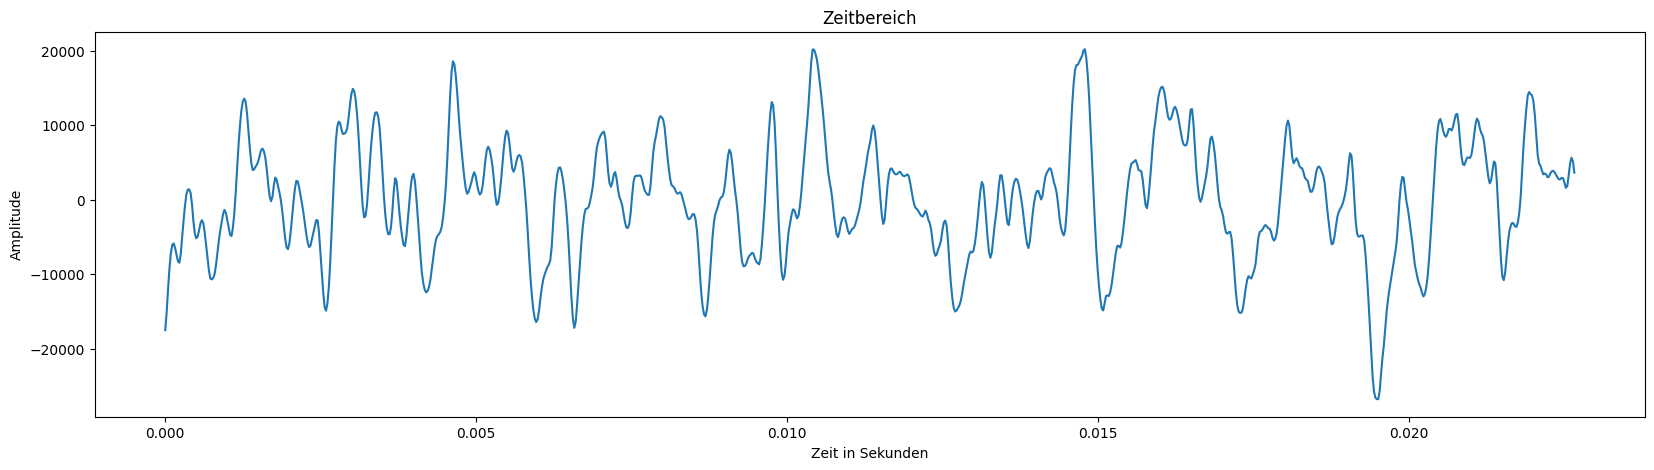

In [17]:
# Zeitbereich bedeutet:
# - x-Achse: die Zeit zu der gemessen wird
# - y-Achse: die gemessene Amplitude

# Wir haben len(data) Messwerte und len(data)/sample_rate Sekunden Audio
# Wir brauchen also len(data) Werte zwischen 0 und len(data)/sample_rate 
sample_count = len(data)
audio_duration = sample_count / sample_rate
x_values = np.linspace(0, audio_duration, sample_count)

print(x_values.shape[0]/sample_count)
# Weil wir viele Werte auf der x-Achse haben, machen wir den Plot etwas breiter
plt.figure(figsize=(20, 5))

# Jetzt können wir auf der y-Achse die Messwerte plotten
plt.plot(x_values, data)
plt.title("Zeitbereich")
plt.xlabel("Zeit in Sekunden")
plt.ylabel("Amplitude")
plt.show()

# Leider sind es so viele Werte sind, dass man nichts erkennen kann
# Deshalb plotten wir noch zusätzlich die ersten 1000 Messwerte.
# Hier kann man besser die überlagerten Sinuskurven erkennen.

plt.figure(figsize=(20, 5))

plt.plot(x_values[:1000], data[:1000])
plt.title("Zeitbereich")
plt.xlabel("Zeit in Sekunden")
plt.ylabel("Amplitude")
plt.show()

#### Plotten im Frequenzbereich

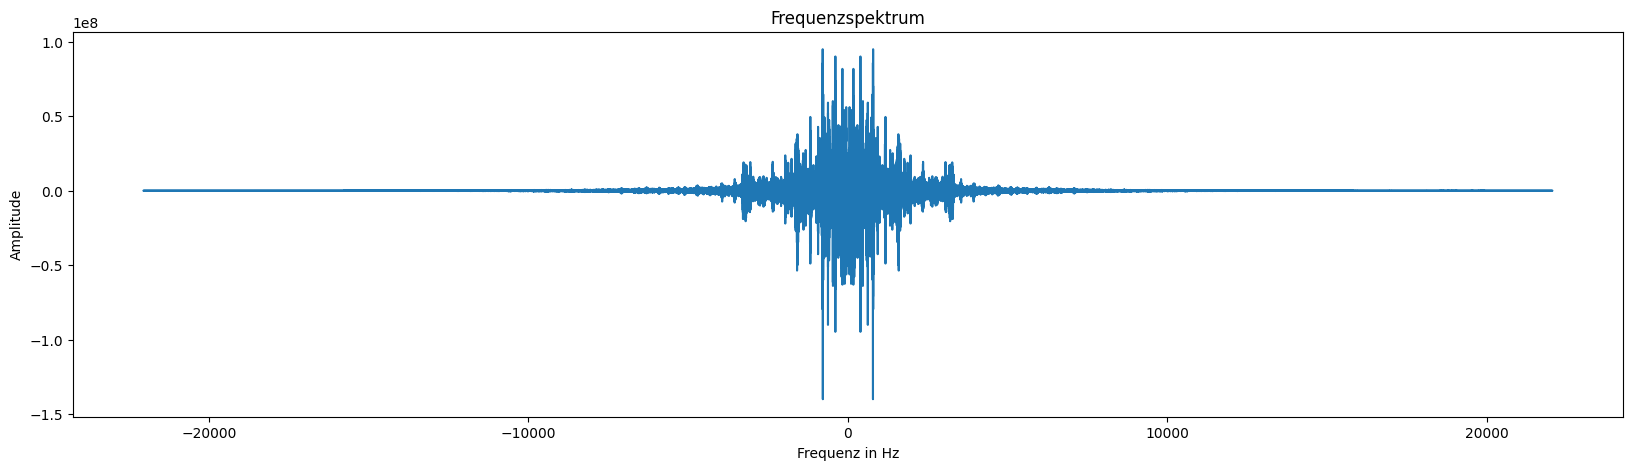

In [18]:
# Wir haben in einem vorherigen Teil, Frequenzen und die dazugehörigen Amplituden berechnet:
# frequencies = Frequenzen
# fourier_result = Amplituden

plt.figure(figsize=(20, 5))

# Jetzt müssen wir diese nur noch auf den Achsen anzeigen.
plt.plot(frequencies, fourier_result)
plt.title("Frequenzspektrum")
plt.ylabel("Amplitude")
plt.xlabel("Frequenz in Hz")
plt.show()